# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
from collections import Counter
from nltk.util import ngrams

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')
api_key

'b0ed45fb6a0b49a8906b4a746dcd5ebd'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q = 'bitcoin', language = 'en')

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(

    q = 'ethereum',
    language='en'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame

# This code is from NLP day 2-5
bitcoin_sentements = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentements.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentements)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.110,0.890
1,The hacker behind last years big Twitter hack\...,2021-03-16,-0.5106,0.000,0.142,0.858
2,Some things are best left a mystery at least a...,2021-02-26,0.6369,0.113,0.000,0.887
3,,2021-03-03,0.0000,0.000,0.000,0.000
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,2021-02-25,0.8316,0.246,0.000,0.754


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentement = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentement.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentement)
ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,Famed auction house Christies just sold its fi...,2021-03-15,0.0000,0.000,0.000,1.000
1,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.110,0.890
2,Here's everything you need to know about non-f...,2021-03-16,-0.1531,0.000,0.062,0.938
3,OpenSea has been one of a handful of NFT marke...,2021-03-18,0.4767,0.084,0.000,0.916
4,NFTs are the latest cryptocurrency rage these ...,2021-03-06,-0.4588,0.066,0.145,0.789


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.038342,0.056842,0.043895,0.846684
std,0.464811,0.077159,0.087203,0.233882
min,-0.906200,0.000000,0.000000,0.000000
25%,-0.125000,0.000000,0.000000,0.810500
50%,0.000000,0.000000,0.000000,0.890000
75%,0.271550,0.087000,0.047500,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.164405,0.070250,0.030750,0.899050
std,0.407550,0.071886,0.046713,0.076916
min,-0.557400,0.000000,0.000000,0.754000
25%,-0.038275,0.000000,0.000000,0.856000
50%,0.160900,0.072000,0.000000,0.916500
75%,0.449150,0.090250,0.064500,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

#### Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at 0.07 compared to that of bitcoin which had a mean positive score of 0.06

#### Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score at 0.16. Bitcoin's was 0.04

#### Q. Which coin had the highest positive score?

A: They both had the exact same max positive score of 0.25

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    addons = ['char', 'ha','reuters']
    # Remove the punctuation from text
    remove_punct = re.compile('[^a-zA-Z]')
   
    # Create a tokenized list of the words
    clean = remove_punct.sub(' ', text).lower()
    words = word_tokenize(clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    clean_words = [word.lower() for word in lem if word not in sw.union(addons)]
    
    return clean_words

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
1,The hacker behind last years big Twitter hack\...,2021-03-16,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."
2,Some things are best left a mystery at least a...,2021-02-26,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
3,,2021-03-03,0.0000,0.000,0.000,0.000,[]
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,2021-02-25,0.8316,0.246,0.000,0.754,"[tl, dr, enter, complete, bitcoin, btc, invest..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Famed auction house Christies just sold its fi...,2021-03-15,0.0000,0.000,0.000,1.000,"[famed, auction, house, christie, sold, first,..."
1,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
2,Here's everything you need to know about non-f...,2021-03-16,-0.1531,0.000,0.062,0.938,"[everything, need, know, non, fungible, token,..."
3,OpenSea has been one of a handful of NFT marke...,2021-03-18,0.4767,0.084,0.000,0.916,"[opensea, one, handful, nft, marketplace, expl..."
4,NFTs are the latest cryptocurrency rage these ...,2021-03-06,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

big_string = []
for i in bitcoin_df['tokens']:
    hopefull = ' '.join(i)
    big_string.append(hopefull)
    
bitcoin_string = ' '.join(big_string)
bitcoin_list = word_tokenize(bitcoin_string)

bigram_counts = dict(Counter(ngrams(bitcoin_list, n = 2)).most_common(20))

In [17]:
# Generate the Ethereum N-grams where N=2
big_string = []
for i in ethereum_df['tokens']:
    hopefull = ' '.join(i)
    big_string.append(hopefull)
    
ethereum_string = ' '.join(big_string)
ethereum_list = word_tokenize(ethereum_string)

bigram_counts = dict(Counter(ngrams(ethereum_list, n = 2)).most_common(20))
bigram_counts

{('non', 'fungible'): 3,
 ('fungible', 'token'): 3,
 ('everything', 'need'): 2,
 ('latest', 'cryptocurrency'): 2,
 ('king', 'leon'): 2,
 ('cryptocurrency', 'platform'): 2,
 ('cryptocurrency', 'exchange'): 2,
 ('hong', 'kong'): 2,
 ('investment', 'giveaway'): 2,
 ('famed', 'auction'): 1,
 ('auction', 'house'): 1,
 ('house', 'christie'): 1,
 ('christie', 'sold'): 1,
 ('sold', 'first'): 1,
 ('first', 'purely'): 1,
 ('purely', 'digital'): 1,
 ('digital', 'piece'): 1,
 ('piece', 'art'): 1,
 ('art', 'whopping'): 1,
 ('whopping', 'million'): 1}

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_most_common_words = token_count(bitcoin_list)
bitcoin_most_common_words

[('bitcoin', 12), ('illustration', 9), ('photo', 7)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
ethereum_most_common_words = token_count(ethereum_list)
ethereum_most_common_words

[('cryptocurrency', 9), ('new', 8), ('ethereum', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

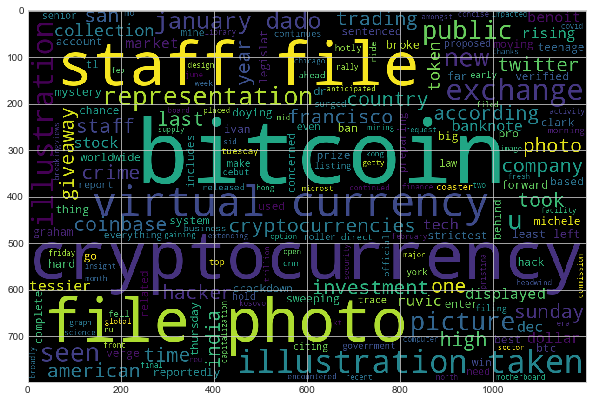

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=800).generate(bitcoin_string)

plt.figure(figsize=[10,10])

plt.imshow(wc)

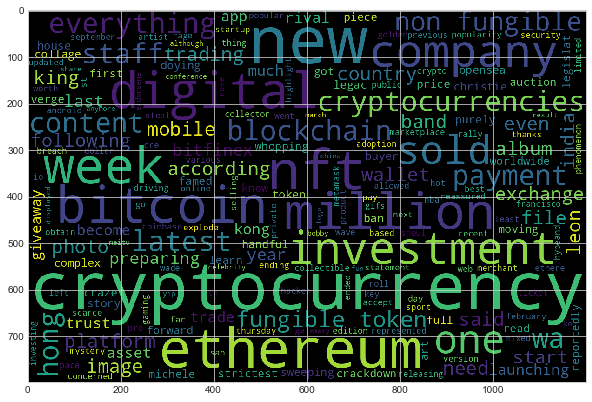

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=800).generate(ethereum_string)

plt.figure(figsize=[10,10])

plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
bitcoin_string

'one strictest crackdown worldwide photo michele doying verge india reportedly moving forward sweeping ban cryptocurrencies according country legislat hacker behind last year big twitter hack sentenced hard time graham ivan clark teenage hacker broke twitter system took verified account used thing best left mystery least far coinbase concerned san francisco based cryptocurrency exchange preparing go public since last year thursday pro  tl dr enter complete bitcoin btc investment giveaway chance win cryptocurrency related prize bitcoin investment giveaway includes everything need get proposed law india would make crime mine trade even hold cryptocurrencies like bitcoin country according new report citing senior government official new york cnn business bitcoin roller coaster ride continues top cryptocurrency surged new time high sunday fell early trading tuesday mo morning coinbase american cryptocurrency exchange released filing ahead direct listing company public debut hotly anticipat

In [36]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_string)

# Add a title to the document
doc.user_data["title"] = "The First Bitcoin Article"

In [37]:
# Render the visualization
displacy.render(doc, style='ent')


In [38]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

one CARDINAL
india GPE
last year DATE
last year DATE
thursday DATE
india GPE
sunday DATE
tuesday DATE
morning TIME
american NORP
sunday DATE
two month DATE
friday DATE
week DATE
february DATE
american NORP
one dollar MONEY


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_string

In [39]:
# Run the NER processor on all of the text
doc1 = nlp(ethereum_string)

# Add a title to the document
doc1.user_data["title"] = "The First Ethereum Article"

In [40]:
# Render the visualization
displacy.render(doc1, style='ent')

In [41]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

one CARDINAL
india GPE
last year DATE
last year DATE
thursday DATE
india GPE
sunday DATE
tuesday DATE
morning TIME
american NORP
sunday DATE
two month DATE
friday DATE
week DATE
february DATE
american NORP
one dollar MONEY


---